# 一元线性回归

生成数据，我们可以适当给数据增加一些扰动来检验线性回归的性能

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def true_fun(X):
    return 1.5*X + 0.2

np.random.seed(0) # 随机种子
n_samples = 30
'''生成随机数据作为训练集'''
X_train = np.sort(np.random.rand(n_samples)) 
y_train = (true_fun(X_train) + np.random.randn(n_samples) * 0.05).reshape(n_samples,1)

实际模型会存在一个偏置量$b$，以一元为例，$y=w_1x_1+b=w^Tb=w_1x_1+w_0x_0$, 实际使用梯度下降法时可以添加一维并令$x_0=1$,则求出的$w_0=b$

In [13]:
# 添加一维数据
data_X = [] 
for x in X_train:
    data_X.append([1,x])
data_X = np.array((data_X))

## 梯度下降训练

### 梯度下降法的过程
<div style="text-align: center">
<img src="./BGD.png" class="aligncenter" width="40%">
</div>

### 如何求取梯度？

假设给定模型$h(\theta)=\sum_{j=0}^{n} \theta_{j} x_{j}$以及目标函数(损失函数):$J(\theta)=\frac{1}{m} \sum_{i=0}^{m}\left(h_{\theta}\left(x^{i}\right)-y^{i}\right)^{2}$, 其中$m$表示数据的量，我们目标是为了$J(\theta)$尽可能小，所以这里加上$\frac{1}{2}$为了后面的简化，即$J(\theta)=\frac{1}{2m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right)^{2}$。  
那么梯度则为：
$$
\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_{j}} &=\frac{1}{m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right) \frac{\partial}{\partial \theta_{j}}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right) \\
&=-\frac{1}{m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right) \frac{\partial}{\partial \theta_{j}}\left(\sum_{j=0}^{n} \theta_{j} x_{j}^{i}-y^{i}\right) \\
&=-\frac{1}{m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right) x_{j}^{i}\\
&=\frac{1}{m} \sum_{i=0}^{m}\left(h_{\theta}(x^{i})-y^{i})\right) x_{j}^{i}
\end{aligned}
$$

设$x$是(m,n)维的矩阵，$y$是(m,1)维度的矩阵，$h_{\theta}$是预测的值，维度与$y$相同，那么梯度用矩阵表示如下:
$$
\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}x^{T}(h_{\theta}-y)
$$




In [14]:
m,p = np.shape(data_X) # m, 数据量 p: 特征数
max_iter = 1000 # 迭代数
weights = np.ones((p,1))  
alpha = 0.1 # 学习率
for i in range(0,max_iter):
    error = np.dot(data_X,weights)- y_train
    gradient = data_X.transpose().dot(error)/m
    weights = weights - alpha * gradient
print("输出参数w:",weights[1:][0]) # 输出模型参数w
print("输出参数:b",weights[0]) # 输出参数b

输出参数w: [1.445439]
输出参数:b [0.22683262]


## 可视化

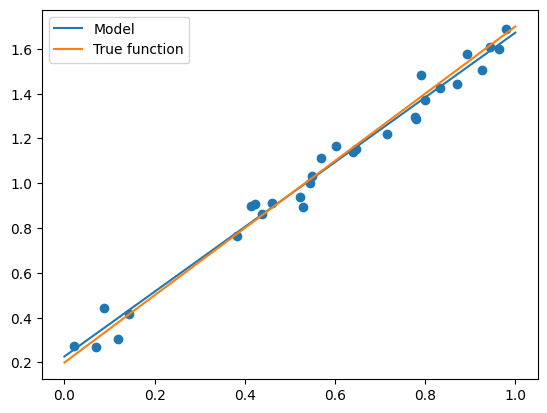

In [15]:
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, X_test*weights[1][0]+weights[0][0], label="Model") 
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X_train,y_train) # 画出训练集的点
plt.legend(loc="best")
plt.show()

## scikit-learn
scikit-learn，简称sklearn，是一个开源的基于python语言的机器学习工具包。它通过NumPy, SciPy和Matplotlib等python数值计算的库实现高效的算法应用，并且涵盖了几乎所有主流机器学习算法。

官网：https://scikit-learn.org/stable/index.html

输出参数w: [[1.4474774]]
输出参数:b [0.22557542]


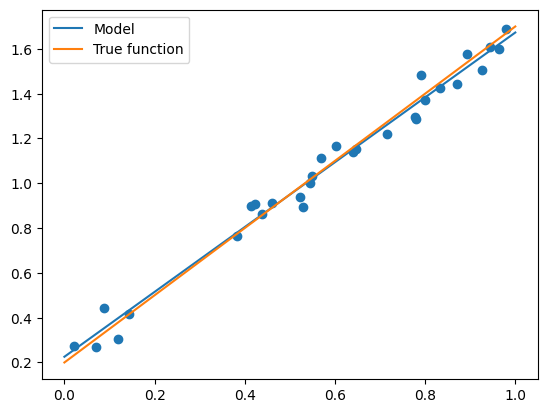

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression # 导入线性回归模型
import matplotlib.pyplot as plt

def true_fun(X):
    return 1.5*X + 0.2

np.random.seed(0) # 随机种子
n_samples = 30
'''生成随机数据作为训练集'''
X_train = np.sort(np.random.rand(n_samples)) 
y_train = (true_fun(X_train) + np.random.randn(n_samples) * 0.05).reshape(n_samples,1)

model = LinearRegression() # 定义模型
model.fit(X_train[:,np.newaxis], y_train) # 训练模型

print("输出参数w:",model.coef_) # 输出模型参数w
print("输出参数:b",model.intercept_) # 输出参数b

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X_train,y_train) # 画出训练集的点
plt.legend(loc="best")
plt.show()

## 多元线性回归

以三元为例，$y=w_1x_1+w_2x_2+w_3x_3+b=w^Tb$

In [17]:
from sklearn.linear_model import LinearRegression

X_train = [[1,1,1],[1,1,2],[1,2,1]]
y_train = [[6],[9],[8]]
 
model = LinearRegression()
model.fit(X_train, y_train)
print("输出参数w:",model.coef_) # 输出参数w1,w2,w3
print("输出参数b:",model.intercept_) # 输出参数b
test_X = [[1,3,5]]
pred_y = model.predict(test_X)
print("预测结果:",pred_y)

输出参数w: [[0. 2. 3.]]
输出参数b: [1.]
预测结果: [[22.]]


## 多项式回归以及过拟合与欠拟合



### 训练集
用来训练模型内参数的数据集

### 验证集
用于在训练过程中检验模型的状态，收敛情况，通常用于调整超参数，根据几组模型验证集上的表现决定哪组超参数拥有最好的性能。

同时验证集在训练过程中还可以用来监控模型是否发生过拟合，一般来说验证集表现稳定后，若继续训练，训练集表现还会继续上升，但是验证集会出现不升反降的情况，这样一般就发生了过拟合。所以验证集也用来判断何时停止训练

### 测试集
测试集用来评价模型泛化能力，即使用训练集调整了参数，之前模型使用验证集确定了超参数，最后使用一个不同的数据集来检查模型。

### 交叉验证

交叉验证法的作用就是尝试利用不同的训练集/测试集划分来对模型做多组不同的训练/测试，来应对测试结果过于片面以及训练数据不足的问题。

![jupyter](./cross_valid.png)





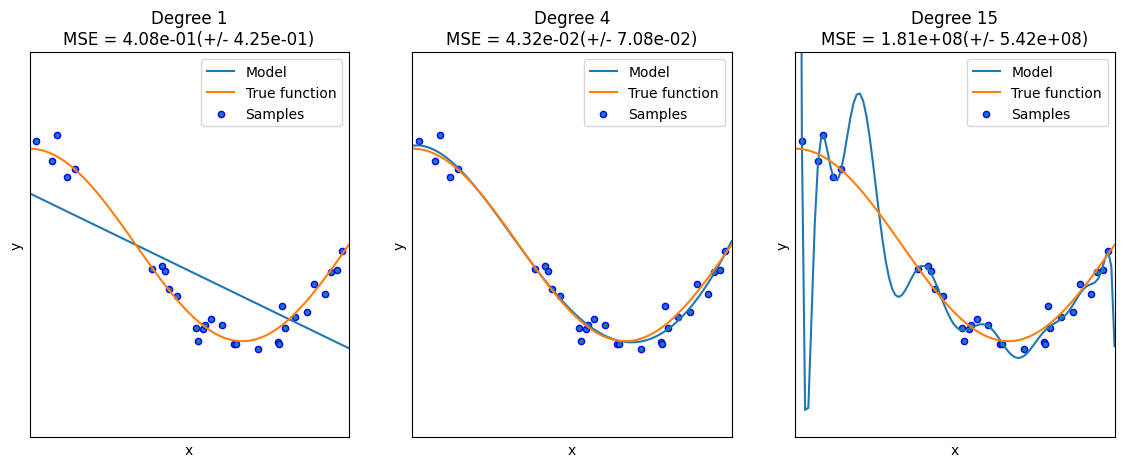

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15] # 多项式最高次

X = np.sort(np.random.rand(n_samples)) 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)]) # 使用pipline串联模型
    pipeline.fit(X[:, np.newaxis], y)

    # 使用交叉验证
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()